In [1]:
import numpy as np
import pandas as pd
from tortreinador.utils.plot import plot_line_2
from tortreinador.utils.preprocessing import load_data
from tortreinador.train import TorchTrainer
from tortreinador.models.MDN import mdn, Mixture, NLLLoss
from tortreinador.utils.View import init_weights, split_weights
import torch
import torch.nn as nn
from tortreinador.utils.metrics import r2_score
import math
from sklearn.preprocessing import MinMaxScaler
import proplot as pplt
import matplotlib
import matplotlib.pyplot as plt
import joblib

In [2]:
df_chunk_0 = pd.read_parquet("D:\\Resource\\rockyExoplanetV3\\data_chunk_0.parquet")
df_chunk_1 = pd.read_parquet("D:\\Resource\\rockyExoplanetV3\\data_chunk_1.parquet")

df_all = pd.concat([df_chunk_0, df_chunk_1])

In [3]:
input_parameters = [
    'Mass', 
    'Radius',
    'FeMg',
    'SiMg',
]


output_parameters = [
    'WRF',
    'MRF',
    'CRF',
    'WMF',
    'CMF', 
    'CPS',
    'CTP',
    'k2'
]

In [4]:
t_loader, v_loader, t_x, t_y, m_x, m_y = load_data(df_all, input_parameters, output_parameters, batch_size=1024)

In [5]:
trainer = TorchTrainer(epoch=200)

Batch size: 512, Epoch:200, is GPU: True


In [6]:
model = mdn(len(input_parameters), len(output_parameters), 20, 512)
init_weights(model)
criterion = NLLLoss()
pdf = Mixture()
optim = torch.optim.Adam(split_weights(model), lr=0.0001, weight_decay=0.001)

In [7]:
t_l, v_l, val_r2, train_r2, mse = trainer.fit_for_MDN(t_loader, v_loader, criterion, model=model, mixture=pdf, model_save_path='D:\\Resource\\MDN\\rockyExoplanetV3\\', optim=optim, best_r2=0.8, warmup_epoch=10, lr_milestones=[5, 15, 40, 105, 120, 130, 140], gamma=0.7)

module.root_layer.0.weight : torch.Size([512, 4])
module.root_layer.0.bias : torch.Size([512])
module.root_layer.2.weight : torch.Size([512, 512])
module.root_layer.2.bias : torch.Size([512])
module.root_layer.4.weight : torch.Size([512, 512])
module.root_layer.4.bias : torch.Size([512])
module.pi.0.weight : torch.Size([512, 512])
module.pi.0.bias : torch.Size([512])
module.pi.2.weight : torch.Size([20, 512])
module.pi.2.bias : torch.Size([20])
module.mu.0.weight : torch.Size([512, 512])
module.mu.0.bias : torch.Size([512])
module.mu.2.weight : torch.Size([160, 512])
module.mu.2.bias : torch.Size([160])
module.sigma.0.weight : torch.Size([512, 512])
module.sigma.0.bias : torch.Size([512])
module.sigma.2.weight : torch.Size([160, 512])
module.sigma.2.bias : torch.Size([160])


  0%|          | 0/2757 [00:00<?, ?batch/s]E:\anaconda\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Epoch 8 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.59batch/s, loss=-28.4461, loss_avg=-28.7192, mse=0.0112, r2=0.8101]


Save Best model: R2:0.8101, Loss Avg:-28.7192


Epoch 9 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.83batch/s, loss=-26.7551, loss_avg=-27.0819, mse=0.0067, r2=0.8638]


Save Best model: R2:0.8638, Loss Avg:-27.0819


Epoch 10 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.45batch/s, loss=-30.8356, loss_avg=-30.8580, mse=0.0045, r2=0.9040]


Save Best model: R2:0.9040, Loss Avg:-30.8580


Epoch 12 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.12batch/s, loss=-30.7675, loss_avg=-30.8405, mse=0.0035, r2=0.9151]


Save Best model: R2:0.9151, Loss Avg:-30.8405


Epoch 16 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.79batch/s, loss=-32.8629, loss_avg=-32.9513, mse=0.0038, r2=0.9183]


Save Best model: R2:0.9183, Loss Avg:-32.9513


Epoch 17 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.65batch/s, loss=-33.7442, loss_avg=-33.8183, mse=0.0038, r2=0.9202]


Save Best model: R2:0.9202, Loss Avg:-33.8183


Epoch 19 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.28batch/s, loss=-32.7988, loss_avg=-32.9241, mse=0.0031, r2=0.9217]


Save Best model: R2:0.9217, Loss Avg:-32.9241


Epoch 21 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.72batch/s, loss=-33.9232, loss_avg=-34.1712, mse=0.0026, r2=0.9221]


Save Best model: R2:0.9221, Loss Avg:-34.1712


Epoch 22 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.23batch/s, loss=-35.0120, loss_avg=-35.2196, mse=0.0023, r2=0.9252]


Save Best model: R2:0.9252, Loss Avg:-35.2196


Epoch 25 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.72batch/s, loss=-34.9330, loss_avg=-35.1362, mse=0.0024, r2=0.9294]


Save Best model: R2:0.9294, Loss Avg:-35.1362


Epoch 26 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.48batch/s, loss=-35.3279, loss_avg=-35.5007, mse=0.0023, r2=0.9328]


Save Best model: R2:0.9328, Loss Avg:-35.5007


Epoch 29 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.83batch/s, loss=-36.1642, loss_avg=-36.3670, mse=0.0056, r2=0.9344]


Save Best model: R2:0.9344, Loss Avg:-36.3670


Epoch 30 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.46batch/s, loss=-36.1922, loss_avg=-36.4350, mse=0.0022, r2=0.9364]


Save Best model: R2:0.9364, Loss Avg:-36.4350


Epoch 33 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.05batch/s, loss=-36.0883, loss_avg=-36.3421, mse=0.0022, r2=0.9373]


Save Best model: R2:0.9373, Loss Avg:-36.3421


Epoch 35 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.57batch/s, loss=-36.3913, loss_avg=-36.6094, mse=0.0019, r2=0.9382]


Save Best model: R2:0.9382, Loss Avg:-36.6094


Epoch 36 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.89batch/s, loss=-36.4962, loss_avg=-36.7606, mse=0.0019, r2=0.9383]


Save Best model: R2:0.9383, Loss Avg:-36.7606


Epoch 37 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.72batch/s, loss=-36.6327, loss_avg=-36.8826, mse=0.0019, r2=0.9387]


Save Best model: R2:0.9387, Loss Avg:-36.8826


Epoch 38 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.46batch/s, loss=-36.7590, loss_avg=-36.9291, mse=0.0019, r2=0.9402]


Save Best model: R2:0.9402, Loss Avg:-36.9291


Epoch 41 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.20batch/s, loss=-36.7746, loss_avg=-37.0269, mse=0.0016, r2=0.9405]


Save Best model: R2:0.9405, Loss Avg:-37.0269


Epoch 42 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.14batch/s, loss=-36.4187, loss_avg=-36.6184, mse=0.0019, r2=0.9432]


Save Best model: R2:0.9432, Loss Avg:-36.6184


Epoch 43 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.83batch/s, loss=-36.5725, loss_avg=-36.7673, mse=0.0018, r2=0.9464]


Save Best model: R2:0.9464, Loss Avg:-36.7673


Epoch 49 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.23batch/s, loss=-36.5521, loss_avg=-36.7567, mse=0.0018, r2=0.9467]


Save Best model: R2:0.9467, Loss Avg:-36.7567


Epoch 50 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.91batch/s, loss=-37.0481, loss_avg=-37.2272, mse=0.0019, r2=0.9470]


Save Best model: R2:0.9470, Loss Avg:-37.2272


Epoch 51 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.84batch/s, loss=-37.1447, loss_avg=-37.3010, mse=0.0017, r2=0.9471]


Save Best model: R2:0.9471, Loss Avg:-37.3010


Epoch 52 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.10batch/s, loss=-37.4206, loss_avg=-37.5547, mse=0.0017, r2=0.9486]


Save Best model: R2:0.9486, Loss Avg:-37.5547


Epoch 53 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.91batch/s, loss=-37.3615, loss_avg=-37.5152, mse=0.0018, r2=0.9486]


Save Best model: R2:0.9486, Loss Avg:-37.5152


Epoch 56 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.68batch/s, loss=-37.2960, loss_avg=-37.3754, mse=0.0020, r2=0.9489]


Save Best model: R2:0.9489, Loss Avg:-37.3754


Epoch 57 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.60batch/s, loss=-37.8397, loss_avg=-37.9229, mse=0.0016, r2=0.9490]


Save Best model: R2:0.9490, Loss Avg:-37.9229


Epoch 59 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.30batch/s, loss=-37.7549, loss_avg=-37.8243, mse=0.0019, r2=0.9501]


Save Best model: R2:0.9501, Loss Avg:-37.8243


Epoch 61 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.14batch/s, loss=-37.9821, loss_avg=-38.0700, mse=0.0018, r2=0.9501]


Save Best model: R2:0.9501, Loss Avg:-38.0700


Epoch 67 Validating: 100%|██████████| 345/345 [00:07<00:00, 49.00batch/s, loss=-38.2057, loss_avg=-38.2663, mse=0.0017, r2=0.9510]


Save Best model: R2:0.9510, Loss Avg:-38.2663


Epoch 70 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.49batch/s, loss=-38.3105, loss_avg=-38.4485, mse=0.0017, r2=0.9513]


Save Best model: R2:0.9513, Loss Avg:-38.4485


Epoch 71 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.63batch/s, loss=-38.4605, loss_avg=-38.5488, mse=0.0021, r2=0.9515]


Save Best model: R2:0.9515, Loss Avg:-38.5488


Epoch 74 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.67batch/s, loss=-38.1203, loss_avg=-38.2623, mse=0.0016, r2=0.9523]


Save Best model: R2:0.9523, Loss Avg:-38.2623


Epoch 75 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.04batch/s, loss=-38.4743, loss_avg=-38.6043, mse=0.0017, r2=0.9528]


Save Best model: R2:0.9528, Loss Avg:-38.6043


Epoch 77 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.63batch/s, loss=-38.5219, loss_avg=-38.6941, mse=0.0018, r2=0.9528]


Save Best model: R2:0.9528, Loss Avg:-38.6941


Epoch 80 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.70batch/s, loss=-38.6158, loss_avg=-38.7831, mse=0.0016, r2=0.9530]


Save Best model: R2:0.9530, Loss Avg:-38.7831


Epoch 81 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.44batch/s, loss=-38.2618, loss_avg=-38.4216, mse=0.0016, r2=0.9544]


Save Best model: R2:0.9544, Loss Avg:-38.4216


Epoch 84 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.17batch/s, loss=-38.7357, loss_avg=-38.9450, mse=0.0014, r2=0.9546]


Save Best model: R2:0.9546, Loss Avg:-38.9450


Epoch 86 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.06batch/s, loss=-38.6278, loss_avg=-38.7841, mse=0.0018, r2=0.9553]


Save Best model: R2:0.9553, Loss Avg:-38.7841


Epoch 89 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.90batch/s, loss=-39.2277, loss_avg=-39.4213, mse=0.0016, r2=0.9561]


Save Best model: R2:0.9561, Loss Avg:-39.4213


Epoch 91 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.39batch/s, loss=-38.7725, loss_avg=-38.9388, mse=0.0015, r2=0.9562]


Save Best model: R2:0.9562, Loss Avg:-38.9388


Epoch 92 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.52batch/s, loss=-39.3730, loss_avg=-39.5325, mse=0.0013, r2=0.9570]


Save Best model: R2:0.9570, Loss Avg:-39.5325


Epoch 96 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.41batch/s, loss=-39.2021, loss_avg=-39.4206, mse=0.0015, r2=0.9578]


Save Best model: R2:0.9578, Loss Avg:-39.4206


Epoch 97 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.58batch/s, loss=-39.4924, loss_avg=-39.6680, mse=0.0015, r2=0.9584]


Save Best model: R2:0.9584, Loss Avg:-39.6680


Epoch 104 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.57batch/s, loss=-39.7617, loss_avg=-39.9709, mse=0.0013, r2=0.9587]


Save Best model: R2:0.9587, Loss Avg:-39.9709


Epoch 106 Validating: 100%|██████████| 345/345 [00:07<00:00, 46.17batch/s, loss=-39.2394, loss_avg=-39.3591, mse=0.0013, r2=0.9587]


Save Best model: R2:0.9587, Loss Avg:-39.3591


Epoch 107 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.39batch/s, loss=-39.8585, loss_avg=-40.0356, mse=0.0013, r2=0.9589]


Save Best model: R2:0.9589, Loss Avg:-40.0356


Epoch 110 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.96batch/s, loss=-39.5483, loss_avg=-39.6880, mse=0.0015, r2=0.9595]


Save Best model: R2:0.9595, Loss Avg:-39.6880


Epoch 116 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.12batch/s, loss=-40.2850, loss_avg=-40.4759, mse=0.0015, r2=0.9598]


Save Best model: R2:0.9598, Loss Avg:-40.4759


Epoch 119 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.93batch/s, loss=-40.1426, loss_avg=-40.3595, mse=0.0015, r2=0.9602]


Save Best model: R2:0.9602, Loss Avg:-40.3595


Epoch 125 Validating: 100%|██████████| 345/345 [00:07<00:00, 47.88batch/s, loss=-40.3888, loss_avg=-40.5849, mse=0.0013, r2=0.9602]


Save Best model: R2:0.9602, Loss Avg:-40.5849


Epoch 126 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.13batch/s, loss=-40.2647, loss_avg=-40.4984, mse=0.0014, r2=0.9603]


Save Best model: R2:0.9603, Loss Avg:-40.4984


Epoch 127 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.95batch/s, loss=-40.4905, loss_avg=-40.7016, mse=0.0012, r2=0.9604]


Save Best model: R2:0.9604, Loss Avg:-40.7016


Epoch 129 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.09batch/s, loss=-40.4259, loss_avg=-40.6292, mse=0.0013, r2=0.9605]


Save Best model: R2:0.9605, Loss Avg:-40.6292


Epoch 130 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.34batch/s, loss=-39.8749, loss_avg=-40.1211, mse=0.0014, r2=0.9607]


Save Best model: R2:0.9607, Loss Avg:-40.1211


Epoch 133 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.81batch/s, loss=-40.6260, loss_avg=-40.8165, mse=0.0017, r2=0.9609]


Save Best model: R2:0.9609, Loss Avg:-40.8165


Epoch 140 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.25batch/s, loss=-40.4869, loss_avg=-40.7100, mse=0.0013, r2=0.9609]


Save Best model: R2:0.9609, Loss Avg:-40.7100


Epoch 141 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.31batch/s, loss=-40.7364, loss_avg=-40.9443, mse=0.0016, r2=0.9609]


Save Best model: R2:0.9609, Loss Avg:-40.9443


Epoch 145 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.35batch/s, loss=-40.7712, loss_avg=-40.9918, mse=0.0012, r2=0.9610]


Save Best model: R2:0.9610, Loss Avg:-40.9918


Epoch 146 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.76batch/s, loss=-40.5696, loss_avg=-40.7809, mse=0.0014, r2=0.9610]


Save Best model: R2:0.9610, Loss Avg:-40.7809


Epoch 148 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.16batch/s, loss=-40.8038, loss_avg=-41.0159, mse=0.0014, r2=0.9612]


Save Best model: R2:0.9612, Loss Avg:-41.0159


Epoch 149 Validating: 100%|██████████| 345/345 [00:07<00:00, 46.14batch/s, loss=-40.7454, loss_avg=-40.9600, mse=0.0015, r2=0.9613]


Save Best model: R2:0.9613, Loss Avg:-40.9600


Epoch 158 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.53batch/s, loss=-40.8090, loss_avg=-41.0422, mse=0.0013, r2=0.9616]


Save Best model: R2:0.9616, Loss Avg:-41.0422


Epoch 180 Validating: 100%|██████████| 345/345 [00:06<00:00, 50.13batch/s, loss=-41.0670, loss_avg=-41.2876, mse=0.0014, r2=0.9617]


Save Best model: R2:0.9617, Loss Avg:-41.2876


Epoch 182 Validating: 100%|██████████| 345/345 [00:07<00:00, 48.74batch/s, loss=-41.0744, loss_avg=-41.2957, mse=0.0015, r2=0.9617]


Save Best model: R2:0.9617, Loss Avg:-41.2957


Epoch 183 Validating: 100%|██████████| 345/345 [00:07<00:00, 49.06batch/s, loss=-41.0793, loss_avg=-41.2992, mse=0.0014, r2=0.9619]


Save Best model: R2:0.9619, Loss Avg:-41.2992


Epoch 188 Validating: 100%|██████████| 345/345 [00:07<00:00, 49.16batch/s, loss=-41.0981, loss_avg=-41.3166, mse=0.0013, r2=0.9619]


Save Best model: R2:0.9619, Loss Avg:-41.3166


Epoch 189 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.38batch/s, loss=-41.1015, loss_avg=-41.3199, mse=0.0012, r2=0.9620]


Save Best model: R2:0.9620, Loss Avg:-41.3199


Epoch 200 Validating: 100%|██████████| 345/345 [00:06<00:00, 49.57batch/s, loss=-41.1355, loss_avg=-41.3563, mse=0.0013, r2=0.9619]


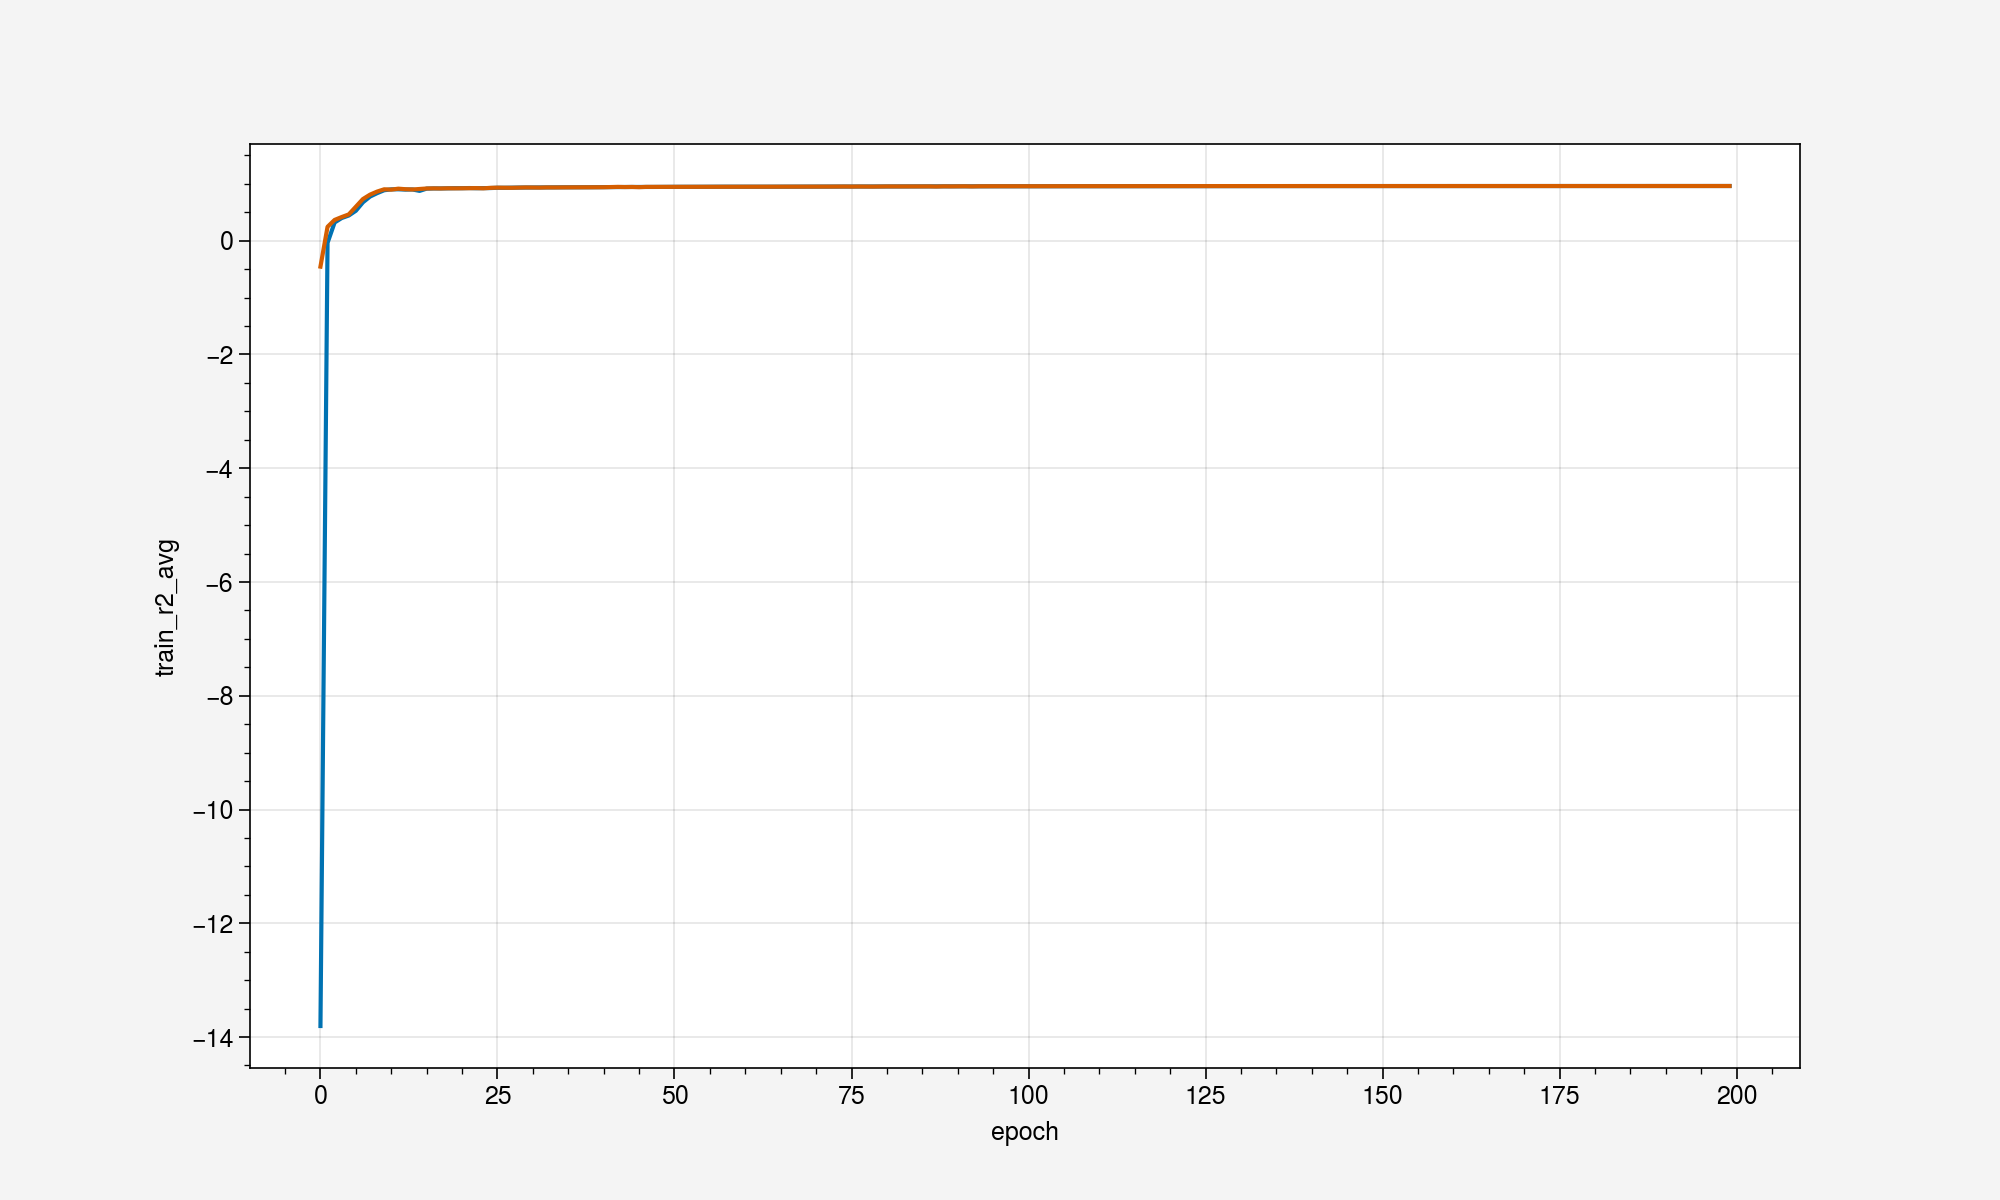

In [8]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(200)
result_pd['train_r2_avg'] = train_r2
result_pd['val_r2_avg'] = val_r2

plot_line_2(y_1='train_r2_avg', y_2='val_r2_avg', df=result_pd, fig_size=(10, 6), output_path=".\\imgs\\ROCKYEXO_MDN20240116_TrainValR2_2.png", dpi=300)

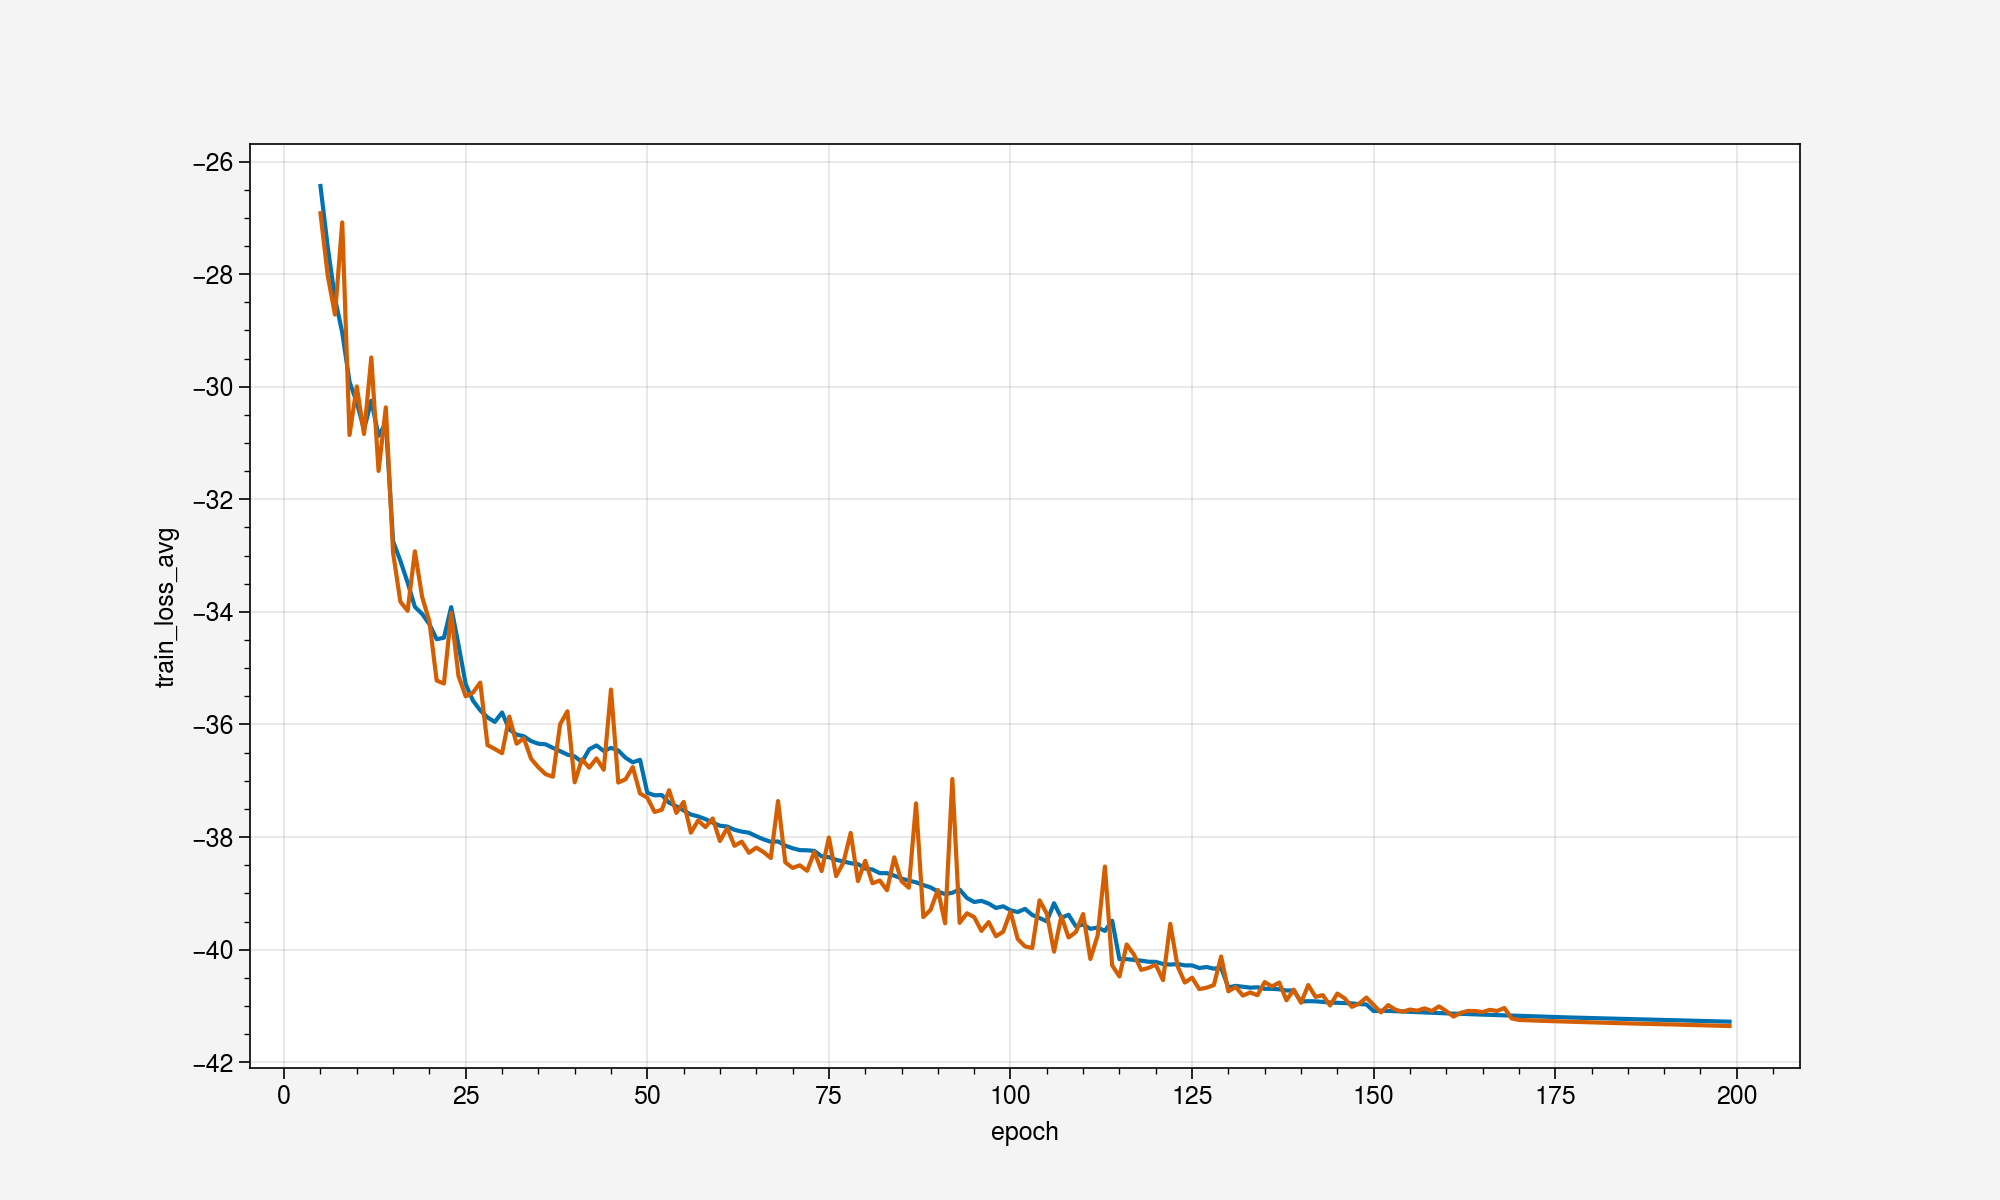

In [9]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(200)
result_pd['train_loss_avg'] = t_l
result_pd['validation_loss_avg'] = v_l

plot_line_2(y_1='train_loss_avg', y_2='validation_loss_avg', df=result_pd.iloc[5:, :], output_path=".\\imgs\\ROCKYEXO_MDN20240116_TrainValLoss_2.png")

In [10]:
r2_distance = np.abs((np.array(train_r2) - np.array(val_r2)).mean())
loss_distance = np.abs((np.array(t_l) - np.array(v_l)).mean())

In [11]:
loss_dis_df = pd.DataFrame(np.abs(np.array(t_l) - np.array(v_l))).iloc[10:, :]

In [12]:
max_dis_10 = loss_dis_df.sort_values(by=0, ascending=False).iloc[:10, :].sort_index()

In [15]:
dis_mean = max_dis_10.mean()

In [13]:
np.save('D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\test_x.npy', t_x)
np.save('D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\test_y.npy', t_y)
# np.save('D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\scaler_x.npy', m_x)
# np.save('D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\scaler_y.npy', m_y)

In [14]:
joblib.dump(m_x, "D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\MDN_v3_Xscaler_20231201.save")
joblib.dump(m_y, "D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\MDN_v3_yscaler_20231201.save")

['D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\MDN_v3_yscaler_20231201.save']

In [16]:
t_x = np.load("D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\test_x.npy")
t_y = np.load("D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\test_y.npy")
m_y = joblib.load("D:\\Resource\\MDN\\TestData\\rockyExoplanetV3\\MDN_v3_yscaler_20231201.save")


In [17]:
model = mdn(len(input_parameters), len(output_parameters), 20, 512)
init_weights(model)
model = nn.DataParallel(model)
model.to("cuda")
model.load_state_dict(torch.load("D:\\Resource\\MDN\\rockyExoplanetV3\\best_model.pth"))

<All keys matched successfully>

In [18]:
model.eval()
# Predict
pi, mu, sigma = model(torch.from_numpy(t_x))
mix = Mixture()
criterion = NLLLoss()
mse = nn.MSELoss()
sample = mix(pi, mu, sigma).sample()
print("NLLLoss: {}, MSE: {}, R2: {}".format(criterion(pi, mu, sigma, torch.from_numpy(t_y).to('cuda')),
                                            mse(torch.from_numpy(t_y).to('cuda'), sample),
                                            r2_score(sample, torch.from_numpy(t_y).to('cuda'))))

NLLLoss: -44.3152751171791, MSE: 0.0013006178500097698, R2: 0.9610450422652743


In [19]:
pi_exp = torch.exp(pi)
mu_np = mu.detach().cpu().numpy()
sigma_np = sigma.detach().cpu().numpy()
pi_np = pi_exp.detach().cpu().numpy()

y_label = np.arange(0,1,0.001).reshape(-1,1)
y_label_ = y_label[:, np.newaxis, np.newaxis, :]

In [20]:
idx_select = np.random.choice(range(0, len(mu_np)), 20000)
mu_sub = mu_np[idx_select]
sigma_sub = sigma_np[idx_select]
pi_sub = pi_np[idx_select]

In [21]:
mu_sub_T = np.transpose(mu_sub, (0, 2, 1))
sigma_sub_T = np.transpose(sigma_sub, (0, 2, 1))

# shape(1000, 6, 100, 10) 1000 data, 6 type, 100 rows with 10 columns every type
exponent = np.exp(-1/2*np.square(np.transpose((y_label_ - mu_sub_T), (1, 2, 0, 3))/sigma_sub_T[:, :, np.newaxis, :]))
factors = 1 / math.sqrt(2*math.pi) / sigma_sub_T[:, :, np.newaxis, :]
GMM_PDF = np.sum(pi_sub[:, np.newaxis, np.newaxis, :]*factors*exponent, axis=-1)
MM = MinMaxScaler()
GMM_PDF = GMM_PDF.reshape(GMM_PDF.shape[0] * GMM_PDF.shape[1], GMM_PDF.shape[-1]).transpose((-1, 0))
# f = e.transpose((-1, 0))
GMM_PDF_scaled = MM.fit_transform(GMM_PDF)

In [22]:
# t_y = t_y.detach().cpu().numpy()
test_y_inverse = m_y.inverse_transform(t_y)
test_y_inverse_sub = test_y_inverse[idx_select]

Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]),

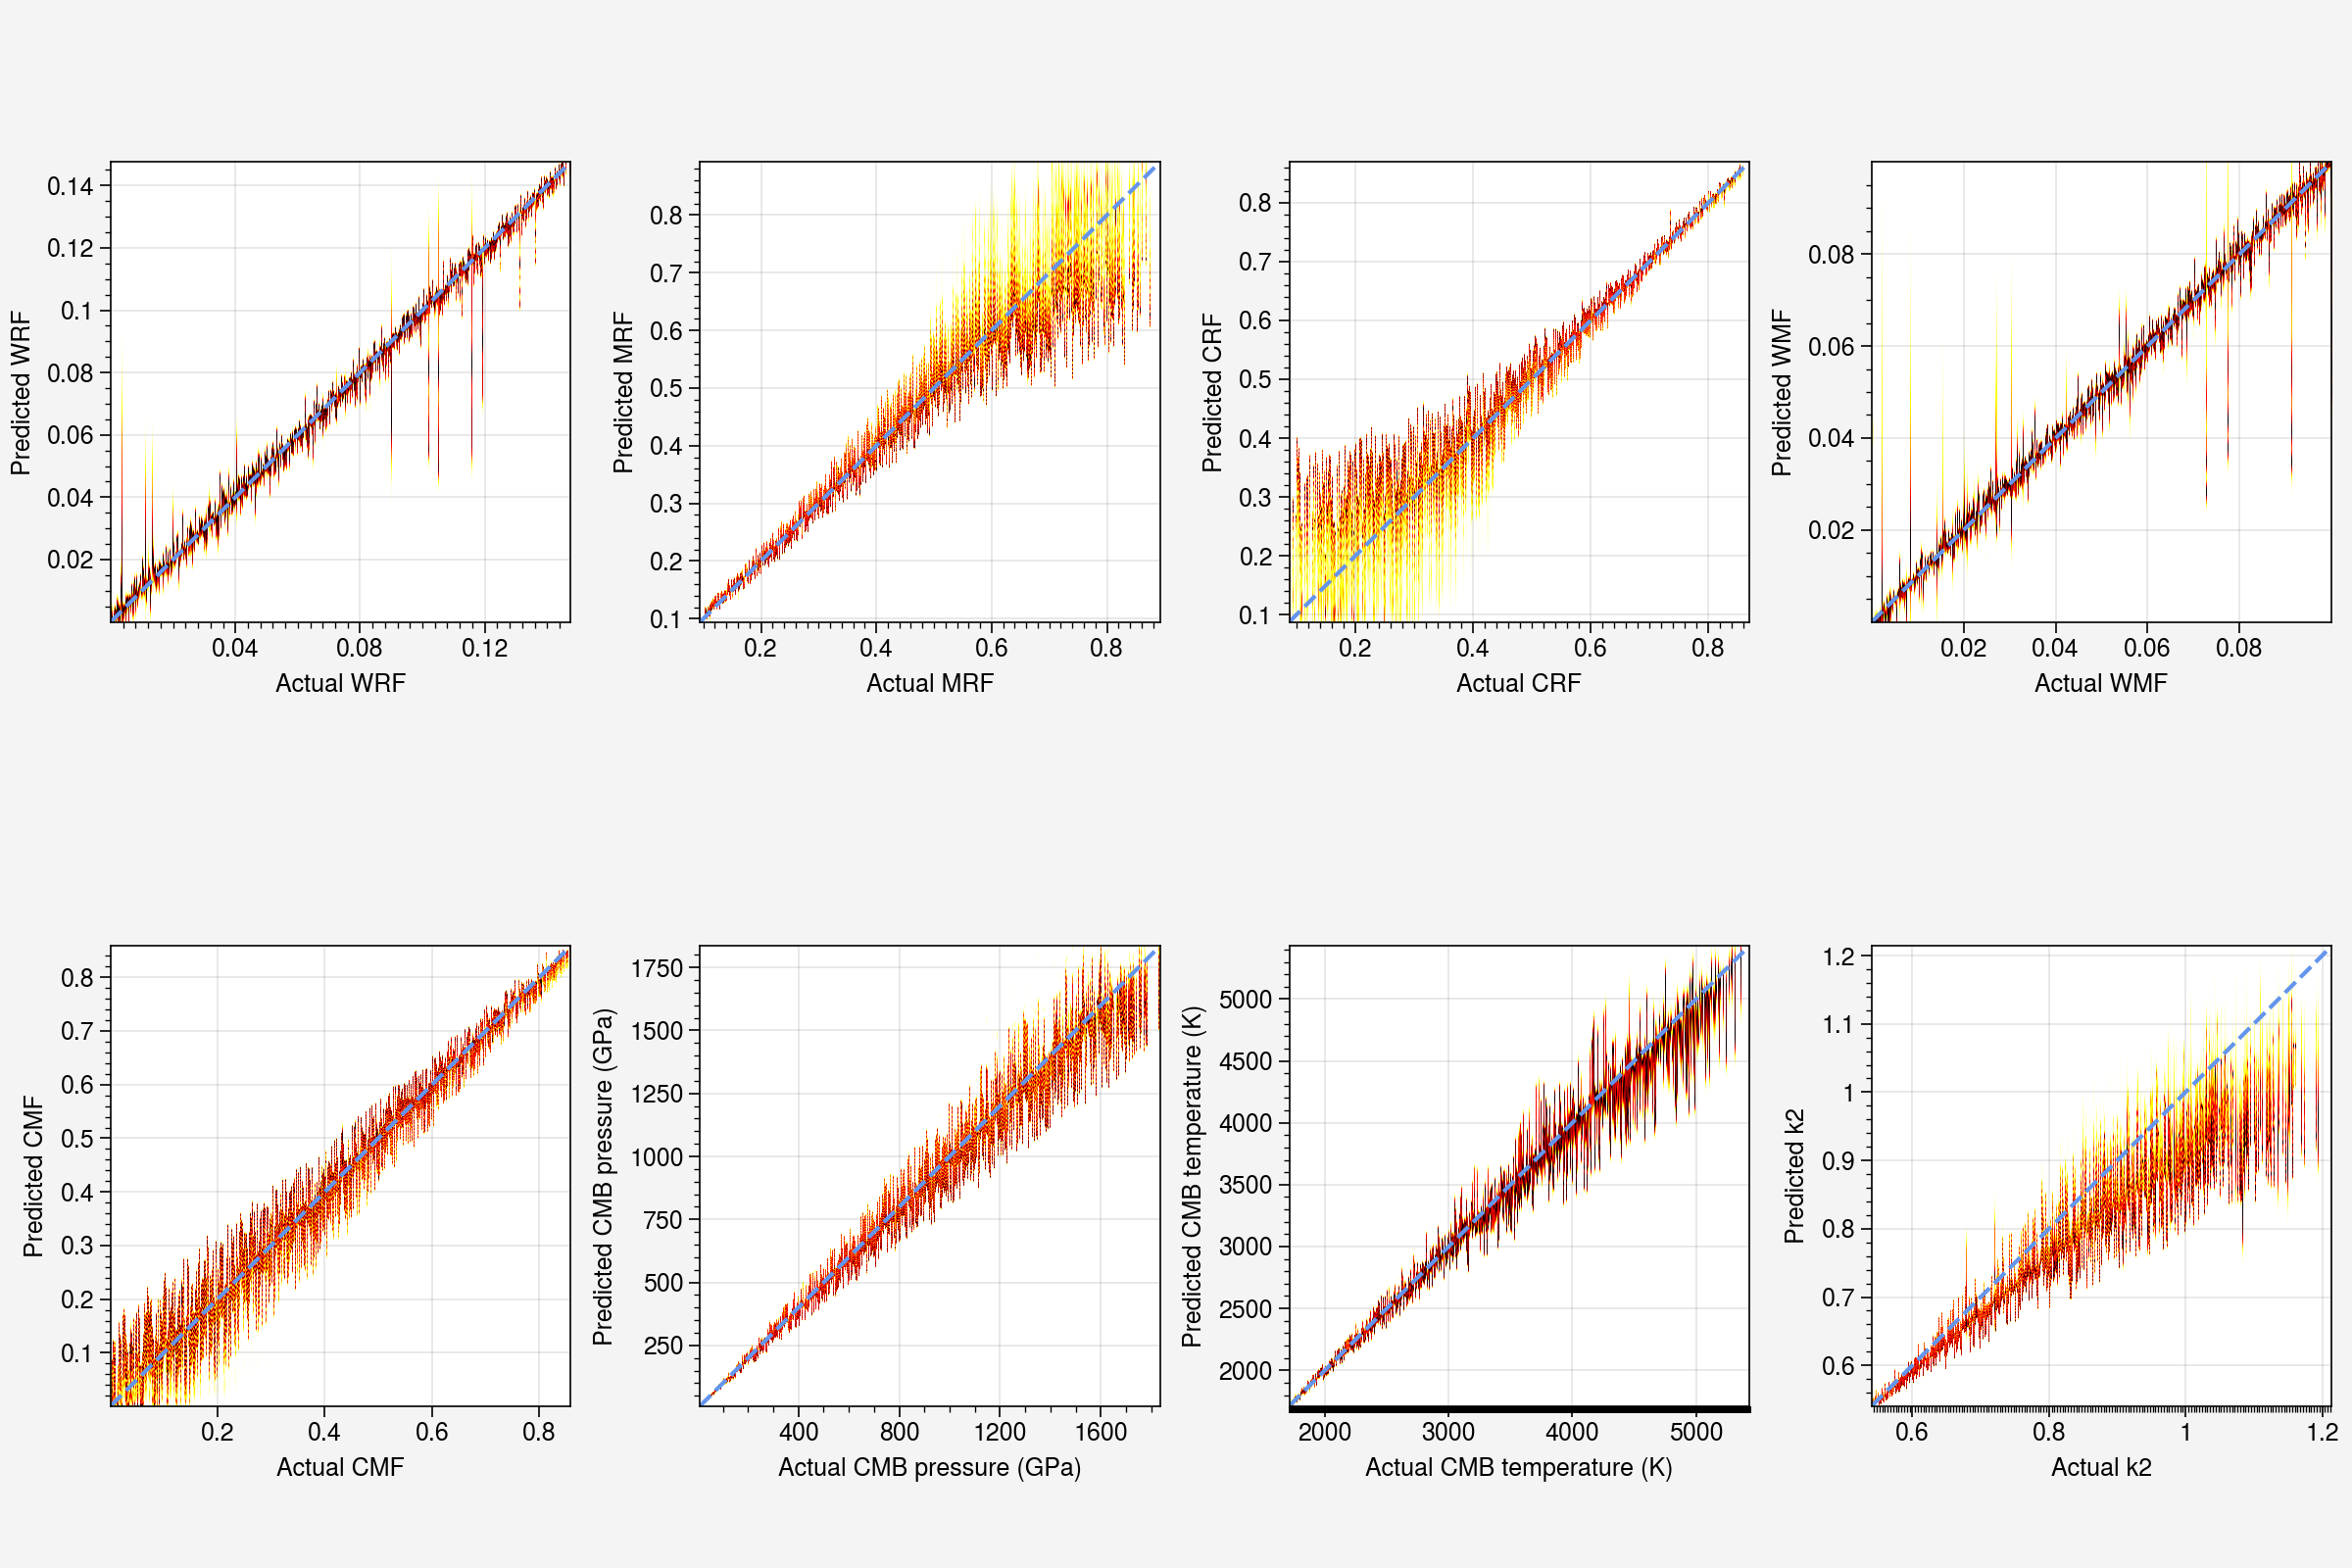

In [23]:
cmap = plt.cm.hot_r
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
fig, axs = pplt.subplots(
#     figsize=(4,4),
    nrows=2, ncols=4,
    share=False, 
    figsize=(12, 8)
#     tight=True,
)

output_parameters = [
    'WRF',
    'MRF',
    'CRF',
    'WMF',
    'CMF', 
    'CPS',
    'CTP',
    'k2'
]


xlabels = [
    "Actual WRF","Actual MRF", "Actual CRF", 
    "Actual WMF","Actual CMF", "Actual CMB pressure (GPa)", "Actual CMB temperature (K)",
    "Actual k2", 
]
ylabels = [
    "Predicted WRF","Predicted MRF", "Predicted CRF", 
    "Predicted WMF","Predicted CMF", "Predicted CMB pressure (GPa)", "Predicted CMB temperature (K)",
    "Predicted k2", 
]

xlocators = [
    0.04, 0.2, 0.2, 0.02, 0.2, 400, 1000, 0.2
]
xminorlocators = [
    0.004, 0.02, 0.02, 0.02, 40, 100, 0.04, 0.004
]

OUTPUT_DIMS = len(output_parameters)

for o in range(OUTPUT_DIMS):
    y_max = max(test_y_inverse_sub[:, o])
    y_min = min(test_y_inverse_sub[:, o])
    for i in range(0, GMM_PDF_scaled.shape[-1], OUTPUT_DIMS):
        tx, ty = [test_y_inverse_sub[int(i / OUTPUT_DIMS), o], y_min]
        axs[o].imshow(
                GMM_PDF_scaled[:, o + i].reshape(-1, 1),
                cmap=cmap,
                norm=norm,
                origin='lower',
                extent=(tx, tx + 0.0001, ty, y_max)
            )

    axs[o].plot([y_min, y_max], [y_min, y_max], c='cornflowerblue', ls='--')
    axs[o].format(
        xlim=(y_min, y_max), ylim=(y_min, y_max),
        xlabel=xlabels[o], ylabel=ylabels[o],
        xlocator=xlocators[o], xminorlocator=xminorlocators[o],
        # ylocator=xlocators[o], yminorlocator=xminorlocators[o]
    )

In [24]:
fig.save('D:\\PythonProject\\RebuildProject\\Rock\\imgs\\prediction_ROCKYV3_20240117.png')

Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 92897 ticks ([1712.3600000000001, ..., 5428.200000000001]),